# easy_ViTPose demo
Be sure to enable GPU runtime

In [1]:
!git clone https://github.com/JunkyByte/easy_ViTPose.git
!cd easy_ViTPose/ && pip install -r requirements.txt && pip install -e .
!pip install huggingface_hub

Cloning into 'easy_ViTPose'...
remote: Enumerating objects: 815, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 815 (delta 176), reused 134 (delta 110), pack-reused 584
Receiving objects: 100% (815/815), 8.98 MiB | 14.97 MiB/s, done.
Resolving deltas: 100% (483/483), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 37.4 MB/s eta 0:00:00
     ━━

# Restart the runtime (runtime -> restart runtime) to update installed packages versions

# Download the models

In [5]:
#@title Choose model and run this cell

MODEL_SIZE = 'b'  #@param ['s', 'b', 'l', 'h']
YOLO_SIZE = 's'  #@param ['s', 'n']
DATASET = 'wholebody'  #@param ['coco_25', 'coco', 'wholebody', 'mpii', 'aic', 'ap10k', 'apt36k']
ext = '.pth'
ext_yolo = '.pt'

In [6]:
import os
from huggingface_hub import hf_hub_download
MODEL_TYPE = "torch"
YOLO_TYPE = "torch"
REPO_ID = 'JunkyByte/easy_ViTPose'
FILENAME = os.path.join(MODEL_TYPE, f'{DATASET}/vitpose-' + MODEL_SIZE + f'-{DATASET}') + ext
FILENAME_YOLO = 'yolov8/yolov8' + YOLO_SIZE + ext_yolo

print(f'Downloading model {REPO_ID}/{FILENAME}')
model_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME)
yolo_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME_YOLO)

# Run inference

In [7]:
# If you get an error from PIL restart environment and rerun this cell to update packages version
from easy_ViTPose import VitInference
model = VitInference(model_path, yolo_path, MODEL_SIZE,
                     dataset=DATASET, yolo_size=320, is_video=False)

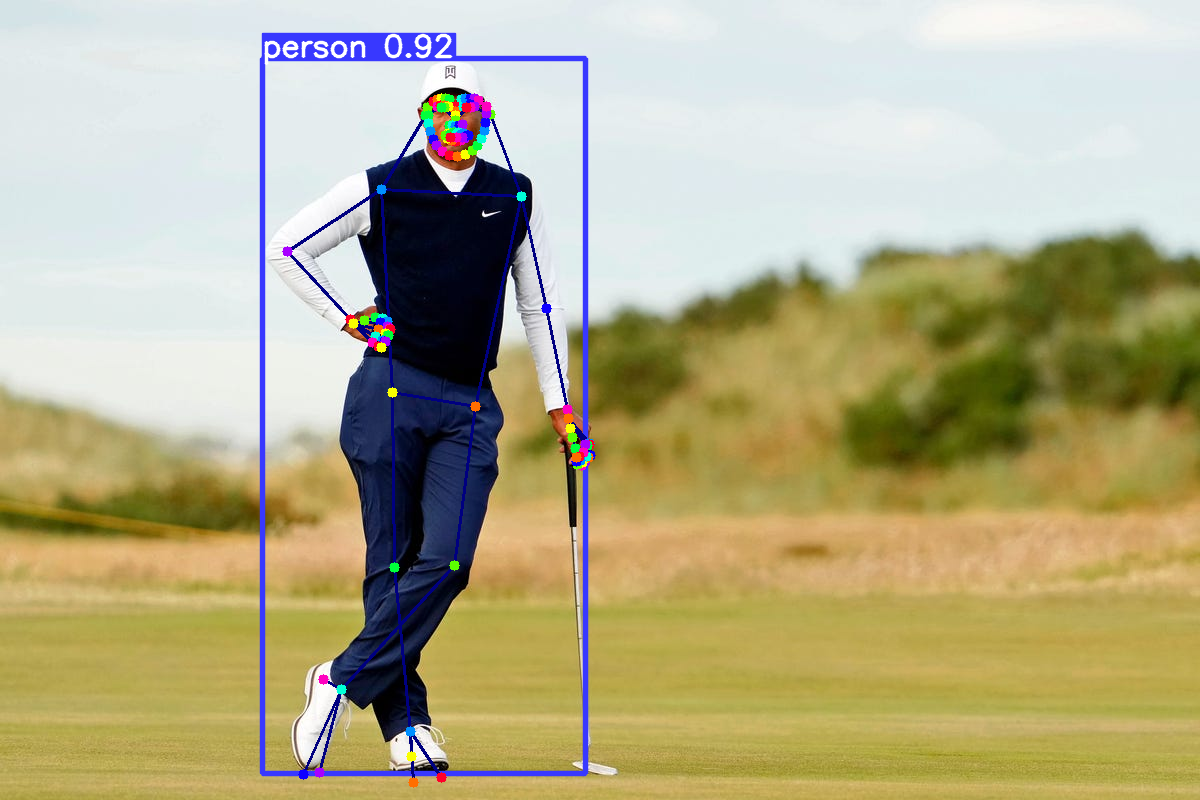

In [8]:
# Run inference on example image
import numpy as np
from io import BytesIO
from PIL import Image
from urllib.request import urlopen

# Load image and run inference
url = 'https://i.ibb.co/gVQpNqF/imggolf.jpg'
img = np.array(Image.open(BytesIO(urlopen(url).read())), dtype=np.uint8)

frame_keypoints = model.inference(img)
img = model.draw(show_yolo=True)

from google.colab.patches import cv2_imshow
cv2_imshow(img[..., ::-1])

Saving img1.jpg to img1.jpg


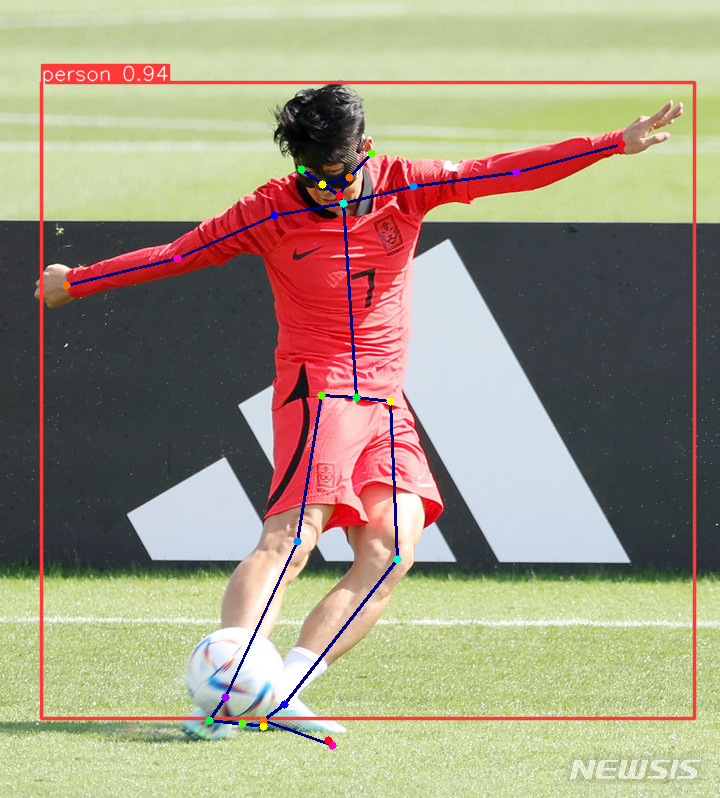

In [ ]:
#@title Custom image
from google.colab import files
import numpy as np
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
from vit_utils.visualization import draw_points_and_skeleton, joints_dict

img = np.array(Image.open(list(files.upload().keys())[0]), dtype=np.uint8)

frame_keypoints = model.inference(img)
img = model.draw(show_yolo=True)

from google.colab.patches import cv2_imshow
cv2_imshow(img[..., ::-1])